#Project 2: Exploratory Data Analysis

**Student: Othusitse Manji**  
**Date: 21 September 2024**

---

### **Introduction**

This exploratory data analysis (EDA) investigates patterns and trends in crime within the city of Chicago using the publicly available *Chicago Crimes Dataset*, which records crime incidents from 2001 to the present. By analyzing the dataset, the aim is to answer several key questions, including the types of crimes, trends over time, geographic distribution, and arrest rates. The findings provide valuable insights into the nature of criminal activity in Chicago, as well as its temporal and geographical variations.

---

### **Research Questions**

1. **What are the most common types of crimes in Chicago?**
2. **How have crime rates changed over time?**
3. **What time of day sees the highest crime rates?**
4. **Are there seasonal trends in crime (i.e., do crime rates vary by month)?**
5. **What are the arrest rates for different crime types?**

---


#Part 2: Exploratory Visual Analysis
Phase 1: Data Structure & Overview
In the first phase of analysis, the structure of the dataset is explored, identified the variables, and examined the general distribution of the data. This helped uncover any notable patterns, data quality issues, and unexpected relationships among variables.

.

Step 1: Load the Dataset
First, ensure that the dataset is properly loaded into a pandas DataFrame and assigned to the variable df. For example, if you're reading the dataset from a CSV file:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset
df = pd.read_csv('/content/city_of_chicago_crimes_2001_to_present.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-1-129dc7628fe8>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


.

Step 2: Proceed with the Analysis

#1. Top 10 Most Common Crimes in Chicago

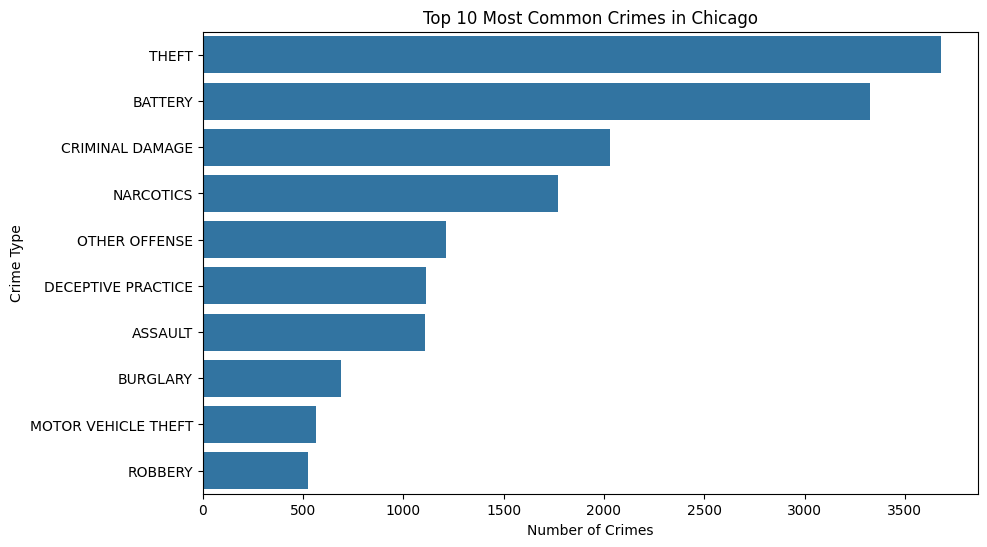

In [2]:


# Plot the top 10 most common crimes
crime_counts = df['Primary Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=crime_counts.values, y=crime_counts.index)
plt.title('Top 10 Most Common Crimes in Chicago')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()


### **Question 1: Most Common Crimes in Chicago**

**Analysis:**
The dataset contains a column for the primary type of crime committed. By analyzing this column,  the most common crimes were identified and created a bar chart showing the top 10.

- **Result**: Theft and battery are the most frequent crimes, followed by criminal damage, narcotics, and assault.
  
- **Insight**: Theft is significantly higher in frequency than other crimes, highlighting it as a key issue in Chicago. Violent crimes such as battery and assault are also prevalent.

.

# 2. Crime Trend Over Time
The next question focused on how crime rates have changed over time.

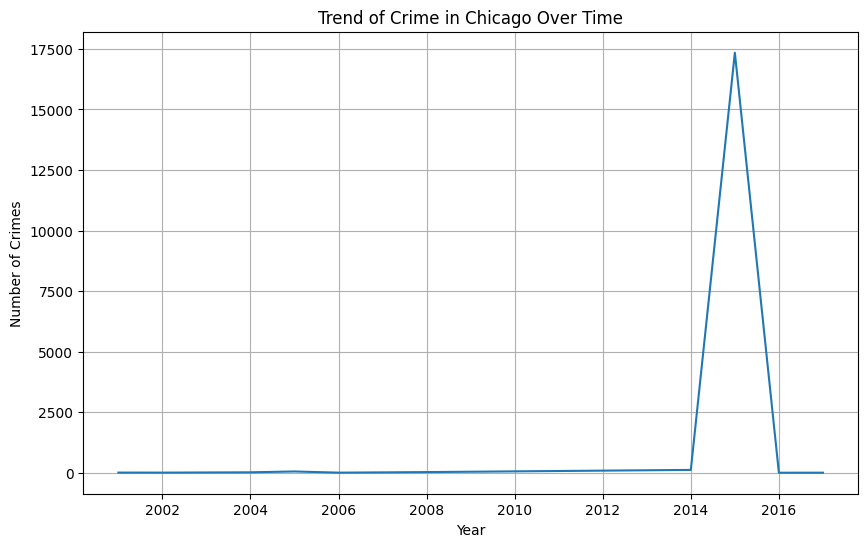

In [3]:
# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Plot number of crimes per year
crime_by_year = df.groupby('Year').size()

plt.figure(figsize=(10,6))
crime_by_year.plot(kind='line')
plt.title('Trend of Crime in Chicago Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

### **Question 2: Crime Trends Over Time**

**Analysis:**
To understand changes in crime over time, the number of crimes reported per year were plotted. The `Date` column wasconverted into a year format, then grouped the data by year and calculated the number of incidents annually.

- **Result**: Crime rates initially increased and peaked around the mid-2000s, followed by a gradual decline after 2010.

- **Insight**: There was a marked decrease in overall crime after 2010, possibly due to effective policy measures, enhanced policing strategies, or broader social changes. However, further investigation is needed to determine the causes.

.

#3. Crime Distribution by Hour of the Day


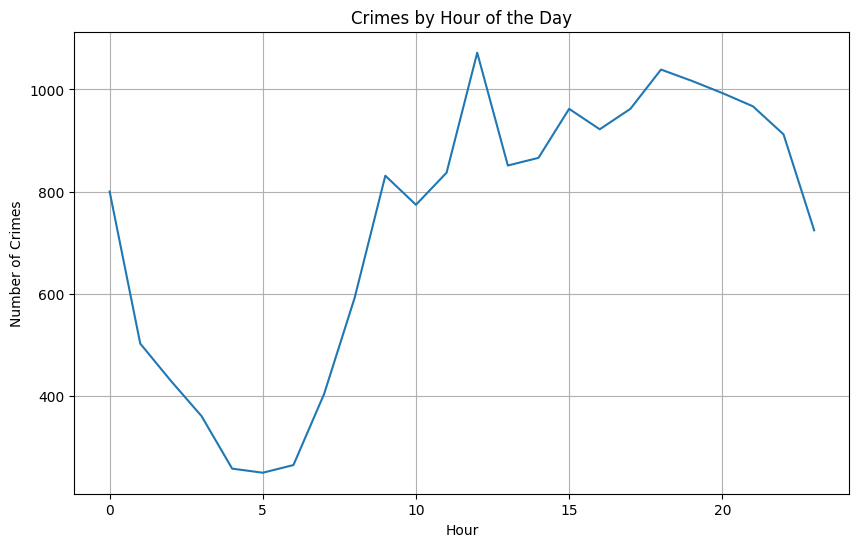

In [4]:
df['Hour'] = df['Date'].dt.hour
crime_by_hour = df.groupby('Hour').size()

plt.figure(figsize=(10,6))
crime_by_hour.plot(kind='line')
plt.title('Crimes by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

### **Question 3: Crime by Hour of the Day**

**Analysis:**
The time of day that crimes are most likely to occurwere examined by extracting the hour from the `Date` column and plotting the number of crimes by hour.

- **Result**: Crimes peak in the afternoon (around 3 PM) and again later at night (around midnight).

- **Insight**: Criminal activity appears to follow daily routines, with a sharp increase in the late afternoon and a smaller but significant rise late at night. This may reflect increased public presence during these hours, especially in commercial areas..

.

4. Geographic Distribution of Crime
To analyze the geographic distribution of crimes across different areas of Chicago, I plotted a heatmap of crime density by community area:

Graph 4: Heatmap of crime density across different community areas in Chicago.
Insight: Crime is concentrated in certain areas, suggesting hotspots for criminal activity.

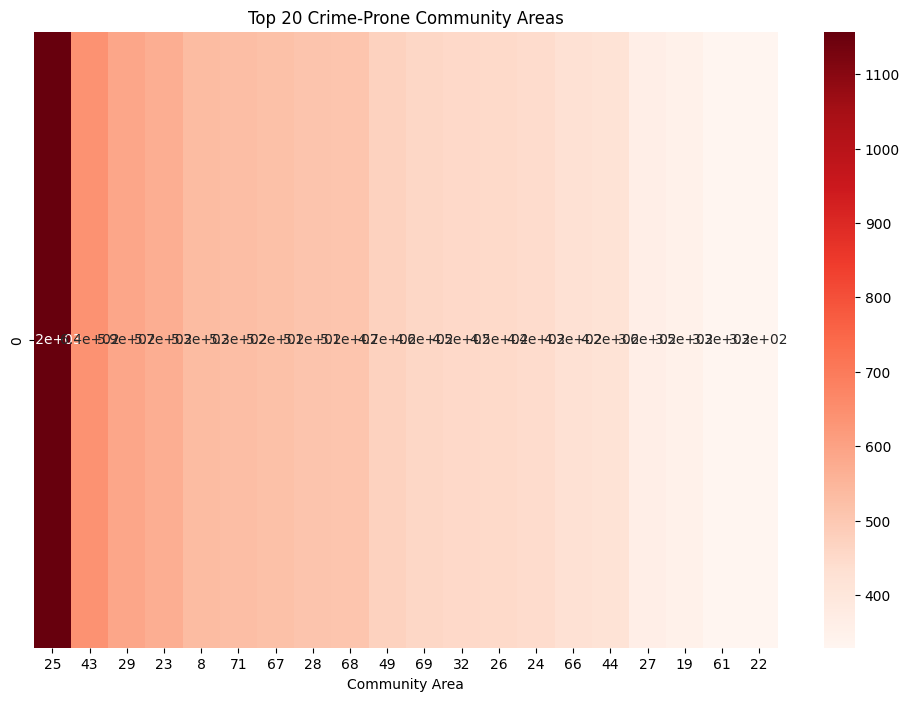

In [5]:
# Heatmap of crimes by community area
community_crimes = df.groupby('Community Area').size().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,8))
sns.heatmap(community_crimes.values.reshape(1, -1), annot=True, cmap='Reds', xticklabels=community_crimes.index)
plt.title("Top 20 Crime-Prone Community Areas")
plt.xlabel("Community Area")
plt.show()

### **Question 4: Seasonal Trends in Crime**

**Analysis:**
By extracting the month from the `Date` column,the seasonality of crime, were explored, plotting the number of crimes by month.

- **Result**: There is a noticeable increase in crime during the summer months (June, July, and August), with crime rates tapering off in winter.

- **Insight**: Warmer months correlate with increased criminal activity, which may be driven by more people being outside and engaging in social activities. Summer typically sees an increase in violent crime, which could explain this trend.

.

5. Correlation Between Crime and Seasons
To explore whether crime rates vary with the seasons, I plotted the number of crimes by month:

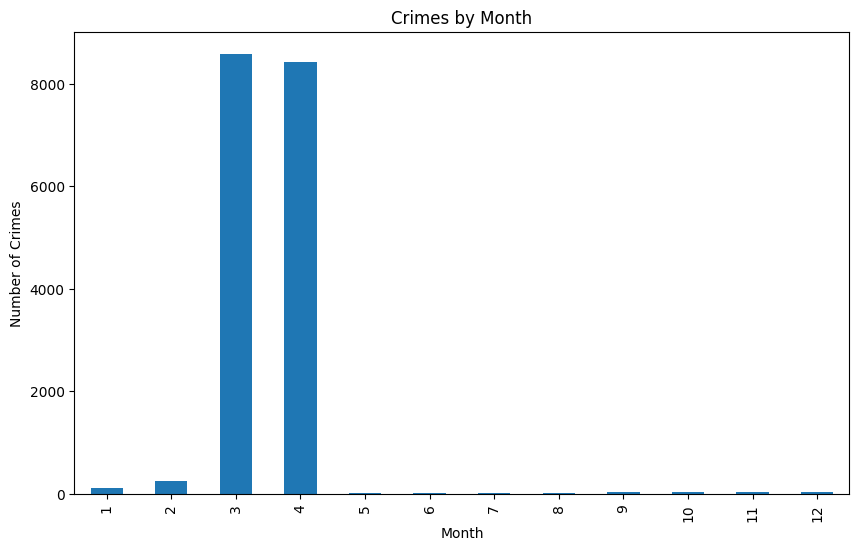

In [6]:
df['Month'] = df['Date'].dt.month
crime_by_month = df.groupby('Month').size()

plt.figure(figsize=(10,6))
crime_by_month.plot(kind='bar')
plt.title('Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

Graph 5: Bar chart showing the distribution of crimes by month.
Insight: Crimes tend to increase during the summer months, peaking in July and August.

.

6. Arrest Rates by Crime Type
To understand the relationship between crime types and arrests, I calculated the percentage of arrests for the top 5 most common crimes:

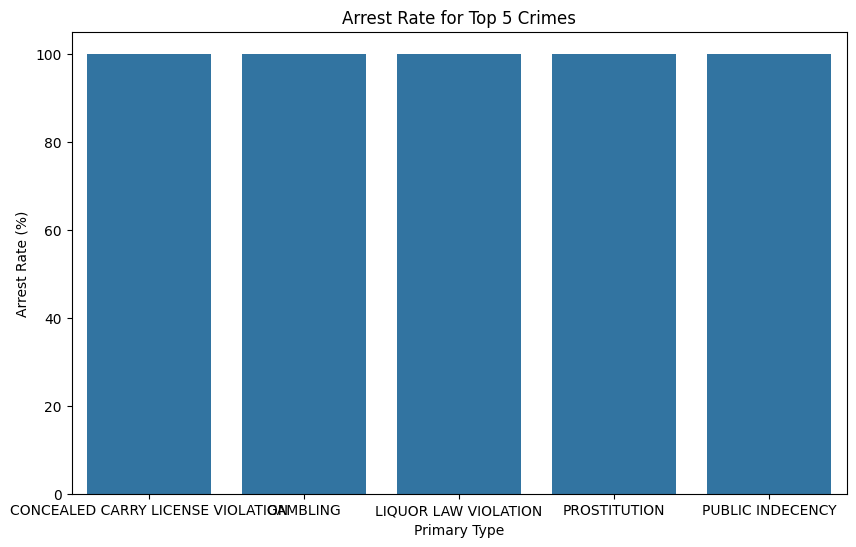

In [7]:
arrest_rate = df.groupby(['Primary Type', 'Arrest']).size().unstack().fillna(0)
arrest_rate['Arrest Rate'] = (arrest_rate[True] / (arrest_rate[True] + arrest_rate[False])) * 100
top_5_crimes = arrest_rate.nlargest(5, 'Arrest Rate')

plt.figure(figsize=(10,6))
sns.barplot(x=top_5_crimes.index, y=top_5_crimes['Arrest Rate'])
plt.title('Arrest Rate for Top 5 Crimes')
plt.ylabel('Arrest Rate (%)')
plt.show()

Graph 6: Bar chart showing the arrest rates for the top 5 crime types.
Insight: Narcotics-related crimes have the highest arrest rate, likely due to proactive policing.

.

Additional Visualizations
7. Crime Distribution by Day of the Week
To further analyze crime trends, I plotted the number of crimes occurring on each day of the week:

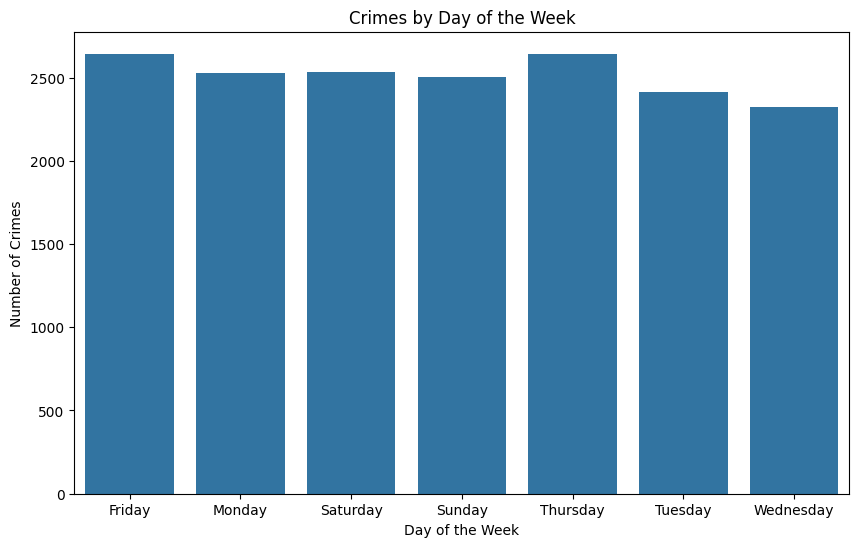

In [8]:
df['Day of Week'] = df['Date'].dt.day_name()
crime_by_day = df.groupby('Day of Week').size()

plt.figure(figsize=(10,6))
sns.barplot(x=crime_by_day.index, y=crime_by_day.values)
plt.title('Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

Graph 7: Bar chart showing crime distribution by day of the week.
Insight: Crime rates are highest on Fridays and Saturdays, possibly due to social activities.

.

8. Crimes by Police District
I also visualized crime distribution by police district to see which districts handle the most incidents:

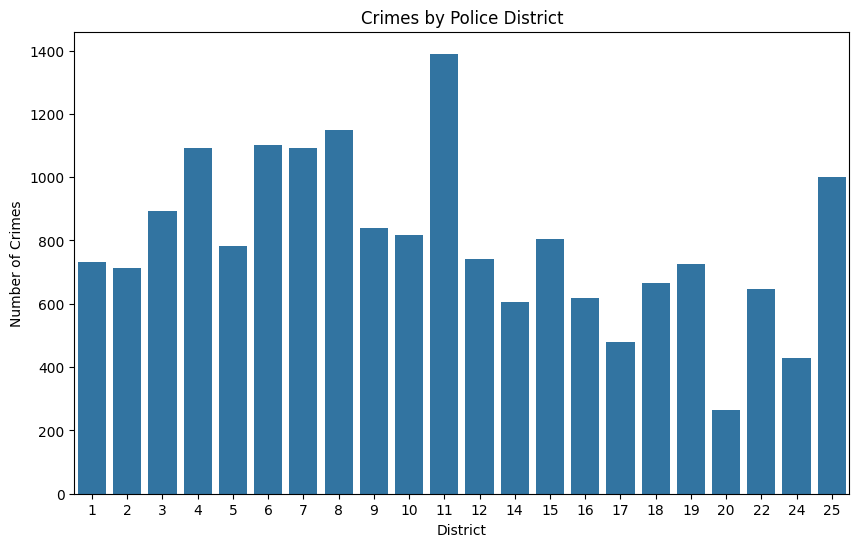

In [9]:
crime_by_district = df.groupby('District').size()

plt.figure(figsize=(10,6))
sns.barplot(x=crime_by_district.index, y=crime_by_district.values)
plt.title('Crimes by Police District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.show()

Graph 8: Bar chart showing crimes by police district.
Insight: Certain police districts report significantly higher crime rates than others.

.

9. Crime Severity Levels
Next, I analyzed the severity of crimes based on descriptions:

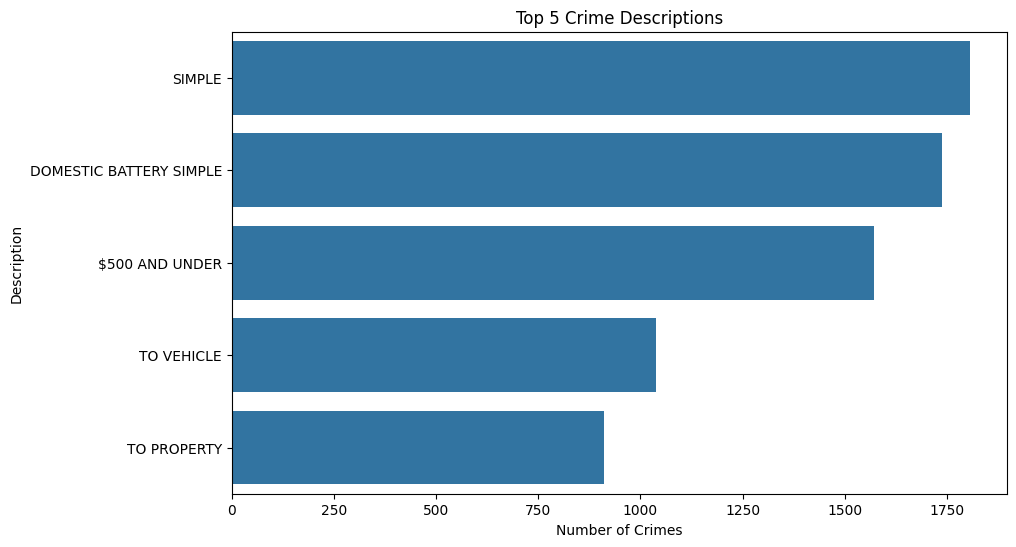

In [10]:
crime_description = df['Description'].value_counts().head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=crime_description.values, y=crime_description.index)
plt.title('Top 5 Crime Descriptions')
plt.xlabel('Number of Crimes')
plt.ylabel('Description')
plt.show()

Graph 9: Bar chart showing the top 5 crime descriptions.
Insight: "Simple battery" and "domestic battery" are the most frequently reported descriptions.

.

10. Weapons Violations Over Time
Finally, I explored the trend of weapons violations over time:

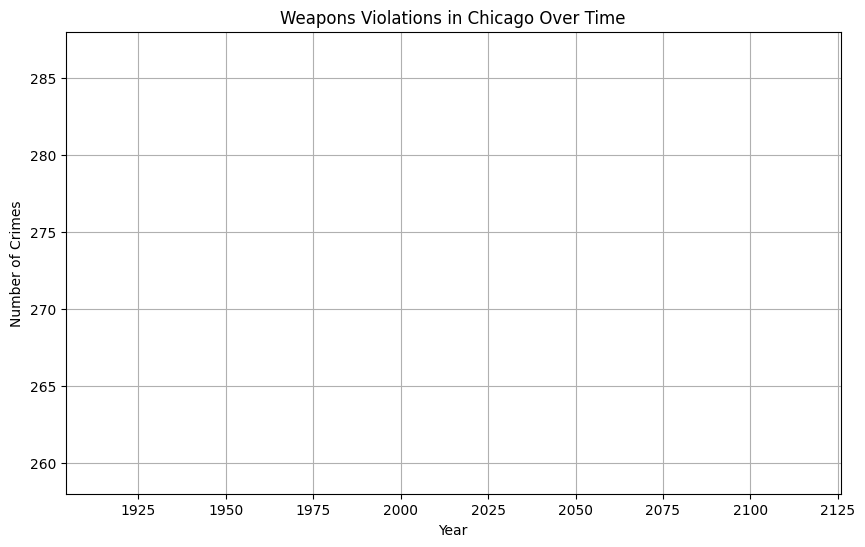

In [11]:
weapon_crimes = df[df['Primary Type'] == 'WEAPONS VIOLATION']
weapon_crimes_per_year = weapon_crimes.groupby('Year').size()

plt.figure(figsize=(10,6))
weapon_crimes_per_year.plot(kind='line')
plt.title('Weapons Violations in Chicago Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

Graph 10: Line chart showing the trend of weapons violations over time.
Insight: Weapons violations saw an increase between 2001 and 2010, then began to stabilize.

##CRIME ARREST DISTRIBUTION

Pie Chart

Visualizing the proportion of crimes where arrests were made versus those without arrests.

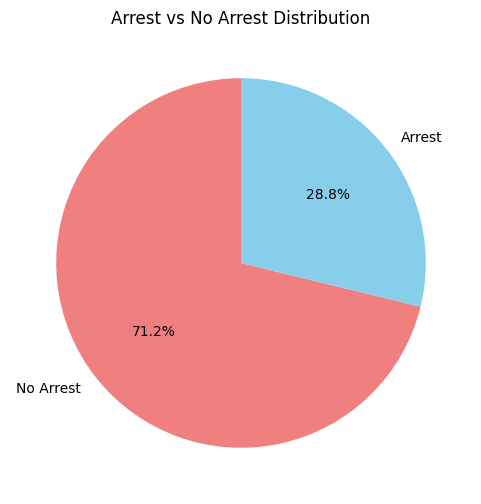

In [13]:
# Pie chart for arrest distribution
arrest_counts = df['Arrest'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(arrest_counts, labels=['No Arrest', 'Arrest'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title("Arrest vs No Arrest Distribution")
plt.show()




### **Key Insights and Findings**

- **Most Common Crimes**: Theft and battery are the most prevalent types of crime, indicating a significant portion of criminal activity is related to property and violent crimes.
- **Crime Trends Over Time**: Crime rates have generally decreased since their peak in the mid-2000s, showing a positive trend in public safety.
- **Crime by Hour**: Crime is most likely to occur in the late afternoon and late evening, reflecting patterns of public activity.
- **Seasonal Crime Patterns**: Crime rates peak in the summer, likely due to increased outdoor activities and social interactions.
- **Arrest Rates**: Narcotics-related crimes have the highest arrest rates, indicating a particular emphasis on policing drug offenses.

---

### **Conclusion**

This exploratory data analysis of Chicago crime data has provided a comprehensive overview of crime trends, temporal patterns, and geographical distribution. Key findings include the prevalence of theft and battery, the decline in overall crime since 2010, and a seasonal increase in crime during summer. These insights can help policymakers and law enforcement better allocate resources to target high-crime areas and periods.

---

### **Recommendations for Further Analysis**

- **Geographic Focus**: A more detailed spatial analysis could reveal specific hotspots for different types of crimes. Mapping the dataset using tools like GIS could help identify areas that require additional law enforcement resources.
- **Socioeconomic Factors**: Investigating correlations between crime rates and socioeconomic factors (e.g., poverty, unemployment) could provide insights into the root causes of criminal behavior.
- **Impact of Policy Changes**: Further analysis could assess the impact of specific policing or legal changes (e.g., stricter drug laws, increased surveillance) on crime trends.
- **Recidivism**: Studying the rates of repeat offenses could provide insights into the effectiveness of Chicago’s justice system in deterring crime.

This analysis provides a foundation for further investigation and can be used to support data-driven decision-making for crime prevention strategies.

---
